In [1]:
#!pip install gym-retro

In [1]:
import gym
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import evolvepy as ep
import matplotlib.pyplot as plt

from evolvepy.integrations.tf_keras import ProcessTFKerasEvaluator, EvolutionaryModel


In [1]:
import numpy as np

In [24]:
w1 = np.random.rand(240, 24)
b1 = np.random.rand(240)

w2 = np.random.rand(140, 240)
b2 = np.random.rand(140)

w3 = np.random.rand(40, 140)
b3 = np.random.rand(40)

w4 = np.random.rand(4,40)
b4 = np.random.rand(4)



In [61]:
import numba

layers = [[w1, b1], [w2,b2], [w3,b3], [w4,b4]]

for i in range(4):
    for j in range(2):
        layers[i][j] = layers[i][j].astype(np.float32)


@numba.njit
def func():
    x = np.empty(24, dtype=np.float32)
    result = x

    for i in range(len(layers)-1):
        layer = layers[i]

        (layer[0] @ result)+layer[1]
        
        (np.abs(result)+result)/2
    
    layer = layers[-1]
    (layer[0] @ result)+layer[1]
    1/(1+np.exp(-result)) 

func()


TypingError: Failed in nopython mode pipeline (step: ensure features that are in use are in a valid form)
[1mThe use of a reflected list(reflected list(array(float32, 2d, C))<iv=None>)<iv=None> type, assigned to variable 'layers' in globals, is not supported as globals are considered compile-time constants and there is no known way to compile a reflected list(reflected list(array(float32, 2d, C))<iv=None>)<iv=None> type as a constant.
[1m
File "<ipython-input-61-ea50405f12f2>", line 15:[0m
[1mdef func():
    <source elided>

[1m    for i in range(len(layers)-1):
[0m    [1m^[0m[0m
[0m

In [49]:
%timeit func()

97.3 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
env = gym.make("BipedalWalker-v3")

In [9]:
model = EvolutionaryModel([keras.layers.Dense(240, activation="relu", input_shape=(24,)),
                        keras.layers.Dense(140, activation="relu"),
                        keras.layers.Dense(40, activation="relu"),
                        keras.layers.Dense(4, activation="sigmoid")])


In [11]:
from rl_utils import BipedalWalkerFitnessFunction

evaluator = ProcessTFKerasEvaluator(BipedalWalkerFitnessFunction, model, n_process=1)
multiple_evaluation = ep.evaluator.MultipleEvaluation(evaluator, 5, discard_max=True, discard_min=True)

In [12]:
first = ep.generator.Layer()
combine = ep.generator.CombineLayer(ep.generator.selection.tournament, ep.generator.crossover.one_point)
mutation = ep.generator.mutation.NumericMutationLayer(ep.generator.mutation.sum_mutation, 1.0, 0.5, (-0.5, 0.5))
filter0 = ep.generator.FilterFirsts(47)
sort = ep.generator.Sort()
filter1 = ep.generator.FilterFirsts(3)
concat = ep.generator.Concatenate()

first.next = combine
combine.next = mutation
combine.next = filter0
filter0.next = concat

first.next = sort
sort.next = filter1
filter1.next = concat

generator = ep.generator.Generator(first_layer=first, last_layer=concat, descriptor=model.descriptor)


In [13]:
from evolvepy.integrations.wandb import WandbLogger

wandb_log = WandbLogger("BipedalWalker", "EvolvePy Example") 
evolver = ep.Evolver(generator, multiple_evaluation, 50) #[ wandb_log])

In [14]:
hist, last_pop = evolver.evolve(1)

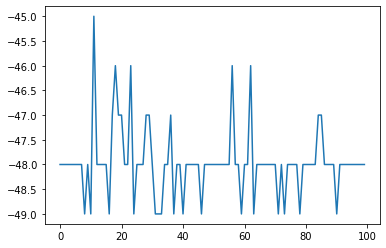

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.max(axis=1))

In [ ]:
from evolvepy.integrations.tf_keras import transfer_weights

best = last_pop[np.argmax(hist[-1])]
transfer_weights(best, model)

In [ ]:
from gym.wrappers import Monitor
env = gym.make("FetchReach-v1")
env = Monitor(env, "./video", force=True)

In [ ]:
fitness_function([model])

-50.0

In [ ]:
env.close()

In [2]:
env = gym.make("Humanoid-v2")
obs = env.reset()

In [5]:
env.action_space

Box([-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
 -0.4 -0.4 -0.4], [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4], (17,), float32)

In [4]:
obs.shape

(376,)

In [51]:
img = env.render(mode="rgb_array")

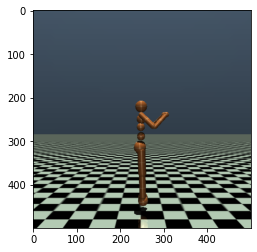

In [53]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [54]:
env.action_space

Box([-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
 -0.4 -0.4 -0.4], [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4], (17,), float32)

In [10]:
from evolvepy.integrations.tf_keras import ProcessTFKerasFitnessFunction, EvolutionaryModel
import evolvepy as ep

In [12]:
model = EvolutionaryModel([keras.layers.Dense(1, input_shape=(1,))])

In [6]:
class TestFunction(ProcessTFKerasFitnessFunction):

    def evaluate(self, model: keras.Model) -> np.ndarray:
        x = np.zeros((1,1))
        return model(x)[0][0].numpy()

In [9]:
evaluator = ep.evaluator.ProcessEvaluator(TestFunction, args=model.get_config())

In [15]:
individuals = np.empty(1, model.descriptor.dtype)

In [ ]:
for i in [0, 20, 78, 222]:
    best = np.load("wandb\\run-20220106_123149-2o9vemwl\\files\\best_individual"+str(i)+".npy", allow_pickle=True).item()
    individuals = np.empty(1, descriptor.dtype)
    
    for name in descriptor.dtype.fields:
        size = descriptor.dtype.fields[name][0].shape[0]
        
        for i in range(size):
            individuals[0][name][i] = best["best_individual/"+name+"/"+str(i)]

    test_evaluator(individuals)